In [7]:
import sys
import pandas as pd
import warnings
import seaborn as sns
from typing import List, Union
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

sys.path.append('functions')
from data_frame_handler import DataFrameHandler as dfh

# main path to file with data. Can be easily changed
file_path = 'data/urine_test_data.csv'

Step 0: Data prep

In [2]:
df = dfh.read_csv_data(file_path)

# Use a list comprehension to dynamically select matching columns
organisms = dfh.select_columns_by_search_terms(df, ['organism'])
genes = dfh.select_columns_by_search_terms(df, ['gene'])
antibiotics = dfh.select_columns_by_search_terms(df, ['antibiotic'])

Step 1: PCA data preparation

In [4]:
# Assuming 'organisms' contains the organism count variables
X = df[organisms]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Step 2: Perform PCA

In [8]:
# Initialize PCA with the number of components you want to retain
# In this example, let's retain all components for now
pca = PCA()

# Fit PCA to the data
pca.fit(X_scaled)

PCA()

Step 3: Plot (scree) explained variance. In the cumulative explained variance plot, you'll see the cumulative proportion of total variance explained by each component.

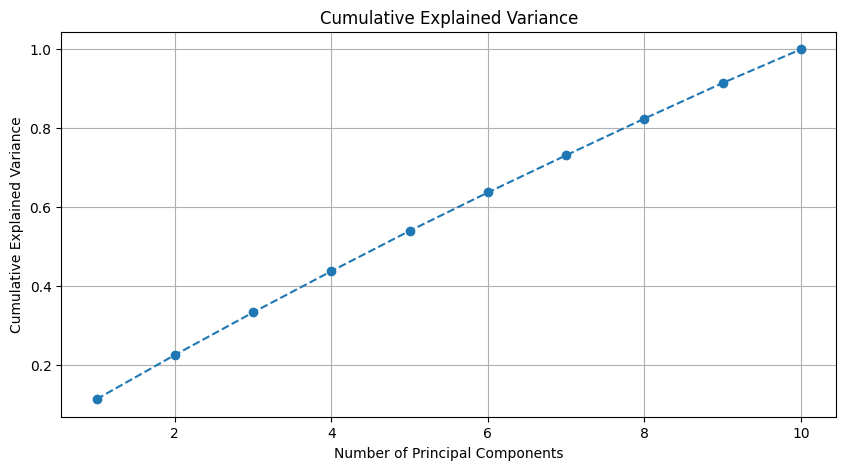

In [9]:
# Plot explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

Step 4: Interpretation
A common rule of thumb is to retain enough components to explain a substantial portion of the total variance, often 95% or more. In this plot, we can see there isn't really a point where the cumulative explained variance levels off. This indicates that PCA may not be waranted here, as there isn't a reflection point of diminishing returns in terms of explaining additional variance.

Step 5: Choose number of components. Based on the chart above, we may be temped to use all possible components. However, this will result in an over-parameterized function and likely not provide any meaningful insight to the data nor useful functions for further predictions. However, for the 'fun' of this exercise, let's go with 8 components to get past at least some quantifiable sigma level.

In [13]:
# Choose the number of components to retain (e.g., n)
n = 8

# Create a new PCA instance with the chosen number of components
pca = PCA(n_components=n)

# Fit and transform the data
X_pca = pca.fit_transform(X_scaled)

Step 6: Interpret Principal Components.
Interpret the principal components to understand the directions in which the original variables contribute the most to the variance. 
You can inspect the loadings of each principal component to understand which variables have the highest weights.

In [17]:
# Get the loadings for all principal components
loadings_all_components = pca.components_

# Create a DataFrame with variable loadings for all components
loadings_df = pd.DataFrame(loadings_all_components, columns=organisms)

# Calculate the explained variance for each component
explained_variance = pca.explained_variance_ratio_
loadings_df['Explained Variance'] = explained_variance

# Display the DataFrame
print("Variable Loadings and Explained Variance for All Principal Components:")
print(loadings_df)

Variable Loadings and Explained Variance for All Principal Components:
   Organism_1  Organism_2  Organism_3  Organism_4  Organism_5  Organism_6  \
0    0.283752    0.232228   -0.403751    0.163950    0.335164    0.602390   
1   -0.195670    0.499004   -0.472594    0.413338   -0.285003   -0.313354   
2    0.601816   -0.046416    0.051566    0.355990   -0.325449    0.049320   
3    0.031014   -0.339730    0.135129    0.152096    0.101754    0.070084   
4   -0.089458    0.079312   -0.123024   -0.364821    0.386775   -0.151168   
5   -0.294912    0.186871   -0.260901   -0.408813   -0.285926    0.242025   
6    0.204608    0.564742    0.298926    0.035242    0.521025   -0.181212   
7    0.270389   -0.225667   -0.470005   -0.246154    0.101082    0.140978   

   Organism_7  Organism_8  Organism_9  Organism_10  Explained Variance  
0   -0.315617   -0.202253   -0.173218    -0.172998            0.113848  
1   -0.129057   -0.030778    0.307810     0.163547            0.111959  
2    0.081412   